# Does the Legal Interest and Energy Efficiency of Buildings Influence the House Prices in Warwick?

## Introduction 

The housing market is influenced by many factors such as economic conditions, geographical settings, and property features. However, it is subject to variables like lease type and energy efficiency. This is especially true in developed regions like the United Kingdom. With its blend of historical and modern residences, Warwick serves as an excellent locality for examining these factors. Analysing the impact of lease type and energy efficiency on house prices in Warwick not only enriches the academic field of real estate valuation but also offers practical benefits for homeowners, investors, and policymakers focused on enhancing property value and encouraging sustainable practices

The type of lease has a big impact on property values and what buyers prefer in the UK, where properties are classified as either leasehold or freehold. Freehold property owners have unlimited ownership and complete control over their property and land which makes them more attractive and valuable than leasehold properties, which are owned for a set period with the land belonging to a freeholder ([Boberg and Metsalo, 2023](https://www.diva-portal.org/smash/get/diva2:1772228/FULLTEXT01.pdf)). The duration of the lease significantly impacts the value of leasehold properties; properties with shorter leases are generally less appealing and have lower value. The importance of energy efficiency in determining real estate prices has increased due to a rise in environmental awareness and surging energy expenses. In the UK, the incorporation of Energy Performance Certificates (EPCs) in 2007 included energy efficiency in property transactions, which contributed to the reduction of global carbon emissions towards the UN net-zero emissions from buildings ([Brounen and Kok, 2011](https://www.sciencedirect.com/science/article/pii/S0095069611000337)). The study of [Fuerst et al (2015)](https://www.sciencedirect.com/science/article/pii/S0140988314003296) emphasized the fact that houses with better EPC ratings tend to sell for higher prices in the market, which is due to lower energy costs and the increased comfort they provide. Moreover, enhancements like enhanced insulation, double-glazing, and efficient heating systems, which boost energy efficiency, not only lower operating expenses (OPEX) but also increase property prices [(Sayce et al., 2010)](https://eprints.kingston.ac.uk/id/eprint/15747/1/Sayce-S-15747.pdf).

Therefore, understanding property prices becomes more complex when considering the relationship between lease type and energy efficiency. Even though freehold properties typically have higher values, leasehold properties with high energy efficiency ratings can help offset some of the cost disadvantages of leasing. Research, including that by [Morrissey et al. (2014)](https://www.emerald.com/insight/content/doi/10.1108/JPIF-01-2014-0008/full/pdf) and Adan and [Fuerst (2015)](https://www.emerald.com/insight/content/doi/10.1108/SASBE-03-2013-0016/full/html), argued that energy efficiency enhancements can positively affect property values irrespective of the ownership model. However, localized studies are necessary to translate these effects in specific contexts like Warwick, where historical and architectural elements also significantly influence property values.

## Hypothesis

**$H_0$**: Legal duration and energy efficiency of the building have no significant impact on real estate prices in Warwick.

**$H_1$**: Legal duration and energy efficiency of the building have a significant impact on real estate prices in Warwick.



### Data Source

The dataset employed in this study was acquired from the UCL database, where the data synthesis involved merging information from the Price Paid Data (LR-PPD) of the Land Registry with property size specifics from the Energy Performance Certificates (EPC) data, which is openly available via the Department for Levelling Up, Housing and Communities (DLUHC, formerly known as MHCLG), utilizing sophisticated address-matching methodologies. The dataset is supervised by Bin Chi, Adam Dennett, Thomas Oleron-Evans, and Robin Morphet for non-commercial objectives, specifically geared toward academic exploration and analysis. The meticulous gathering and administration of the data highlights a commitment to ensuring its accuracy and reliability for scholarly pursuits, showcasing the dedication of the aforementioned individuals to fostering a conducive environment for academic research endeavors. Integrating diverse sources of information within the dataset highlights the comprehensive nature of the research process, reflecting a holistic approach that leverages multiple data streams to enrich the analytical insights derived from the dataset.
Access  this dataset via London DataStore 'hpm la 2023.zip' folder then 'Warwick_link_02122023.csv' at this [**link**](https://raw.githubusercontent.com/Bhassan98/DSSS/36c10d1661dd5a7cb070bc5b3138d387bb4de1d9/Data/Warwick_link_02122023.csv). 

### Data Columns

| Column Name                  | Interpretation                  |
|------------------------------|---------------------------------|
| priceper                     | Price per square meter          |
| year                         | Transaction year                |
| dateoftransfer               | Transfer completion data        |
| propertytype                 | Property type                   |
| duration                     | Property tenure                 |
| price                        | Price of property               |
| postcode                     | Property postcode               |
| lad21cd                      | Local code in 2021              |
| transactionid                | Identifier                      |
| id                           | EPCs Identifier                 |
| tfarea                       | Total floor area                |
| numberrooms                  | Number of rooms                 |
| classt                       | Class matching type             |
| CURRENT_ENERGY_EFFICIENCY    | Current energy efficiency rating|
| POTENTIAL_ENERGY_EFFICIENCY  | Potential energy efficiency     |
| CONSTRUCTION_AGE_BAND        | Age band                        |

Where: F = Freehold,  L = Leasehold




### Loading Libraries 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy import stats
from scipy.stats import sem
import statistics
import statsmodels
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as sps


### Data Loading

In [2]:
warw_data = pd.read_csv('https://raw.githubusercontent.com/Bhassan98/DSSS/36c10d1661dd5a7cb070bc5b3138d387bb4de1d9/Data/Warwick_link_02122023.csv')

In [3]:
warw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63554 entries, 0 to 63553
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   priceper                     63554 non-null  float64
 1   year                         63554 non-null  int64  
 2   dateoftransfer               63554 non-null  object 
 3   propertytype                 63554 non-null  object 
 4   duration                     63554 non-null  object 
 5   price                        63554 non-null  float64
 6   postcode                     63554 non-null  object 
 7   lad21cd                      63554 non-null  object 
 8   transactionid                63554 non-null  object 
 9   id                           63554 non-null  int64  
 10  tfarea                       63554 non-null  float64
 11  numberrooms                  58808 non-null  float64
 12  classt                       63554 non-null  int64  
 13  CURRENT_ENERGY_E

In [4]:
print(warw_data)

          priceper  year dateoftransfer propertytype duration     price  \
0      3302.752294  2013     2013-03-22            D        F  360000.0   
1      2370.129870  2010     2010-07-30            D        F  292000.0   
2      2921.710670  2004     2004-06-25            F        L  133902.0   
3      3054.767619  2005     2005-12-16            F        L  140000.0   
4      2100.394366  2013     2013-01-04            S        F  149128.0   
...            ...   ...            ...          ...      ...       ...   
63549  1821.917808  2002     2002-05-31            S        F  133000.0   
63550  1492.123967  2012     2012-12-19            S        F  180547.0   
63551  1936.842105  2000     2000-06-07            S        F   92000.0   
63552  4631.578947  2011     2011-09-28            S        F  220000.0   
63553  6631.578947  2019     2019-06-17            S        F  315000.0   

       postcode    lad21cd                           transactionid        id  \
0       CV8 2AS  E0

### Data Checks and Cleaning

In [5]:
# Checking for NAs or null values in the warc_data frame and count of all columns
NAs_incolumns = warw_data.isna().sum()
print("NA or null values count per column (including zeros):")
print(NAs_incolumns)

NA or null values count per column (including zeros):
priceper                          0
year                              0
dateoftransfer                    0
propertytype                      0
duration                          0
price                             0
postcode                          0
lad21cd                           0
transactionid                     0
id                                0
tfarea                            0
numberrooms                    4746
classt                            0
CURRENT_ENERGY_EFFICIENCY         0
POTENTIAL_ENERGY_EFFICIENCY       0
CONSTRUCTION_AGE_BAND           637
dtype: int64


It can be observed that the `numberrooms` and `CONSTRUCTION_AGE_BAND` in the `warc_data` frame have `4746` and `637` NAs and null values in the dataset. These columns will not be included in the analysis as they are not the main focus of the study and will not impact the analysis results. The variables (columns) to be used for this analysis are `price`, `tfarea`, `current_energy_efficiency`, `potential_energy_efficiency`, and `duration`.

##  Exploratory Data Analysis (EDA)

**Descriptive statistics of the Warwick dataset**

In [6]:
# Replace inf and NaN values in the priceper column with np.nan
warw_data['priceper'] = warw_data['priceper'].replace([np.inf, -np.inf], np.nan)
# Round to two decimal places
d_stats =warw_data.describe().round(2)  
#.T transposes the table (rows become columns and vice versa)
d_stats = d_stats.T 
d_stats

,count,mean,std,min,25%,50%,75%,max
priceper,63540.0,2518.10,1213.26,17.44,1609.20,2455.9,3276.42,22774.04
year,63554.0,2009.25,8.16,1995.00,2002.00,2009.0,2016.00,2023.00
price,63554.0,238293.55,179485.01,1500.00,125000.00,195000.0,300000.00,6213700.00
id,63554.0,13966195.48,114504.78,13833429.00,13948045.00,13963390.0,13978769.00,18882703.00
tfarea,63554.0,95.25,53.92,0.00,64.49,83.6,110.00,2852.00
numberrooms,58808.0,4.65,1.86,1.00,3.00,4.0,6.00,60.00
classt,63554.0,11.26,0.44,11.00,11.00,11.0,12.00,12.00
CURRENT_ENERGY_EFFICIENCY,63554.0,63.57,12.87,1.00,57.00,65.0,72.00,114.00
POTENTIAL_ENERGY_EFFICIENCY,63554.0,77.34,10.84,1.00,73.00,79.0,84.00,118.00


The total housing transaction recorded in Warwick is **63,540**. The average house price is **238,294** with a standard deviation of **179,485**, delineating the spread of the house price. However, the minimum house price of **1500** against a maximum of **6,213,700** signals the existence of an outlier because a house price of **1,500** is unrealistic to be true including a house price with a total floor area of `0`. Therefore, log-linear will be adopted to mitigate it or a better approach will be adopted thus eliminating the outlier before running the model.

### Data Visualisation

In [7]:
warw_data.columns

Index(['priceper', 'year', 'dateoftransfer', 'propertytype', 'duration',
       'price', 'postcode', 'lad21cd', 'transactionid', 'id', 'tfarea',
       'numberrooms', 'classt', 'CURRENT_ENERGY_EFFICIENCY',
       'POTENTIAL_ENERGY_EFFICIENCY', 'CONSTRUCTION_AGE_BAND'],
      dtype='object')

In [8]:
# for easy use, rename columns
warw_data.rename(columns={
    'CURRENT_ENERGY_EFFICIENCY': 'c_energy',
    'POTENTIAL_ENERGY_EFFICIENCY': 'p_energy'
}, inplace=True)


In [9]:
#checking 
warw_data.columns

Index(['priceper', 'year', 'dateoftransfer', 'propertytype', 'duration',
       'price', 'postcode', 'lad21cd', 'transactionid', 'id', 'tfarea',
       'numberrooms', 'classt', 'c_energy', 'p_energy',
       'CONSTRUCTION_AGE_BAND'],
      dtype='object')

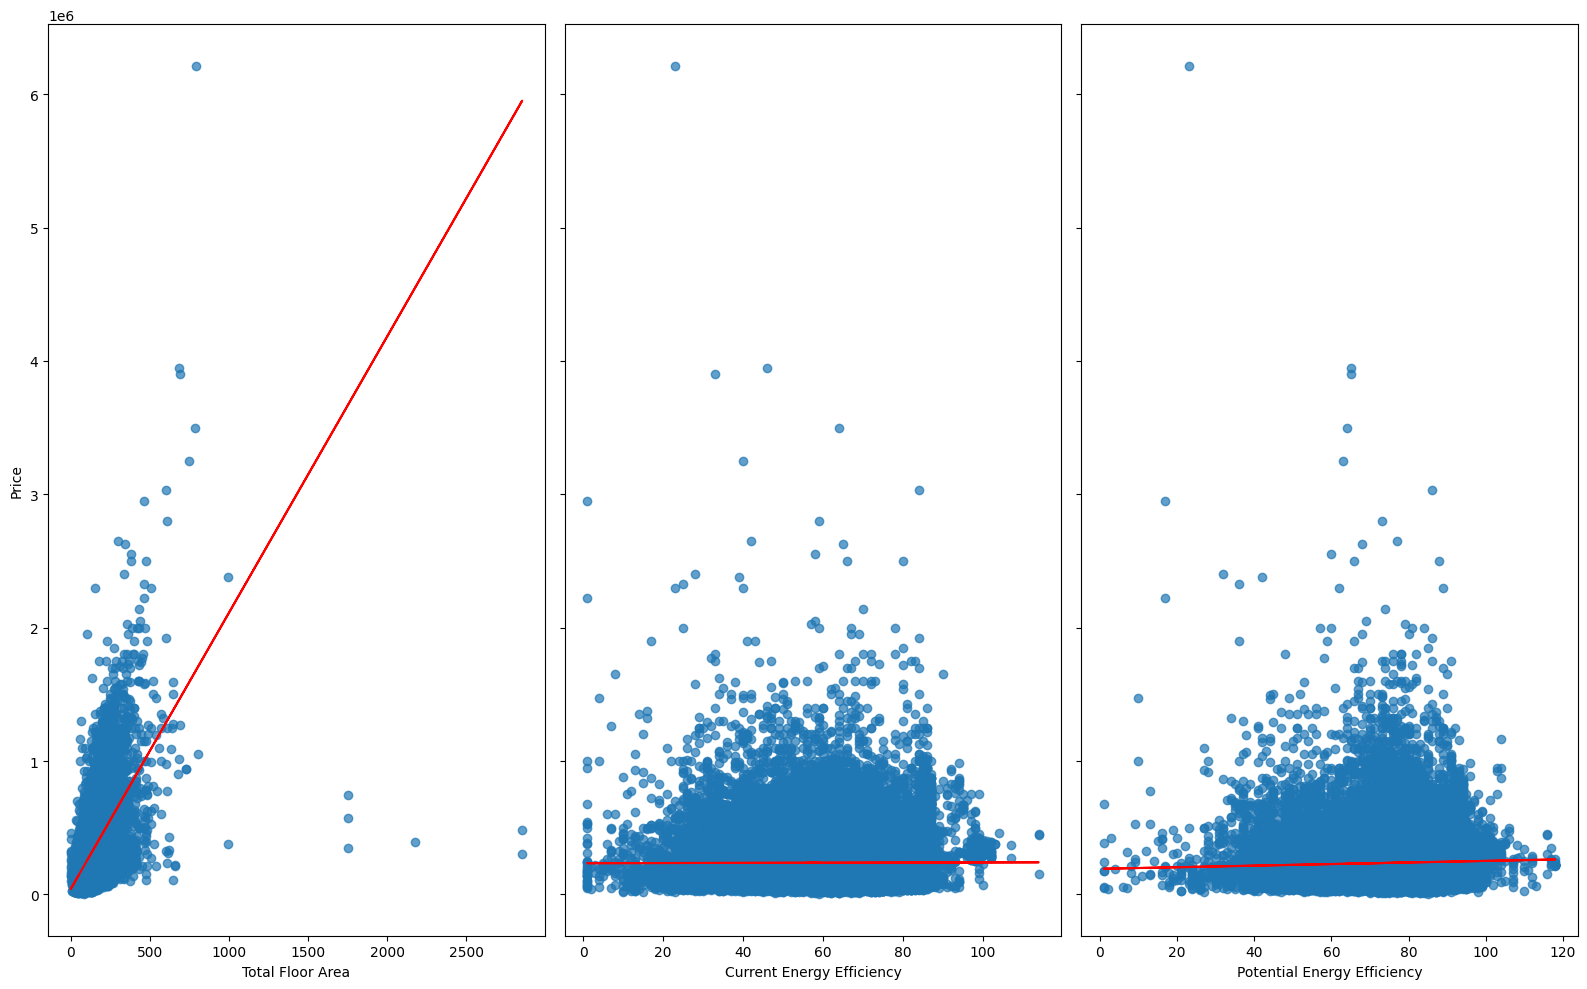

In [10]:

# visualize the relationship between the dependent and the response variables 

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 10))
m, b = np.polyfit(warw_data['tfarea'], warw_data['price'], 1)
axs[0].scatter(warw_data['tfarea'], warw_data['price'], alpha=0.7)
axs[0].plot(warw_data['tfarea'], m*warw_data['tfarea'] + b, color='red')
axs[0].set_xlabel('Total Floor Area')
axs[0].set_ylabel('Price')

m, b = np.polyfit(warw_data['c_energy'], warw_data['price'], 1)
axs[1].scatter(warw_data['c_energy'], warw_data['price'], alpha=0.7)
axs[1].plot(warw_data['c_energy'], m*warw_data['c_energy'] + b, color='red')
axs[1].set_xlabel('Current Energy Efficiency')

m, b = np.polyfit(warw_data['p_energy'], warw_data['price'], 1)
axs[2].scatter(warw_data['p_energy'], warw_data['price'], alpha=0.7)
axs[2].plot(warw_data['p_energy'], m*warw_data['p_energy'] + b, color='red')
axs[2].set_xlabel('Potential Energy Efficiency')
#avoiding overlap
plt.tight_layout()  
plt.show()

The plot for total floor area demonstrates a positive relationship through the upward slope of the regression line. However, the slope of the regression line on the graphs of current and potential energy seems less steep, indicating a weaker linear relationship with house prices.

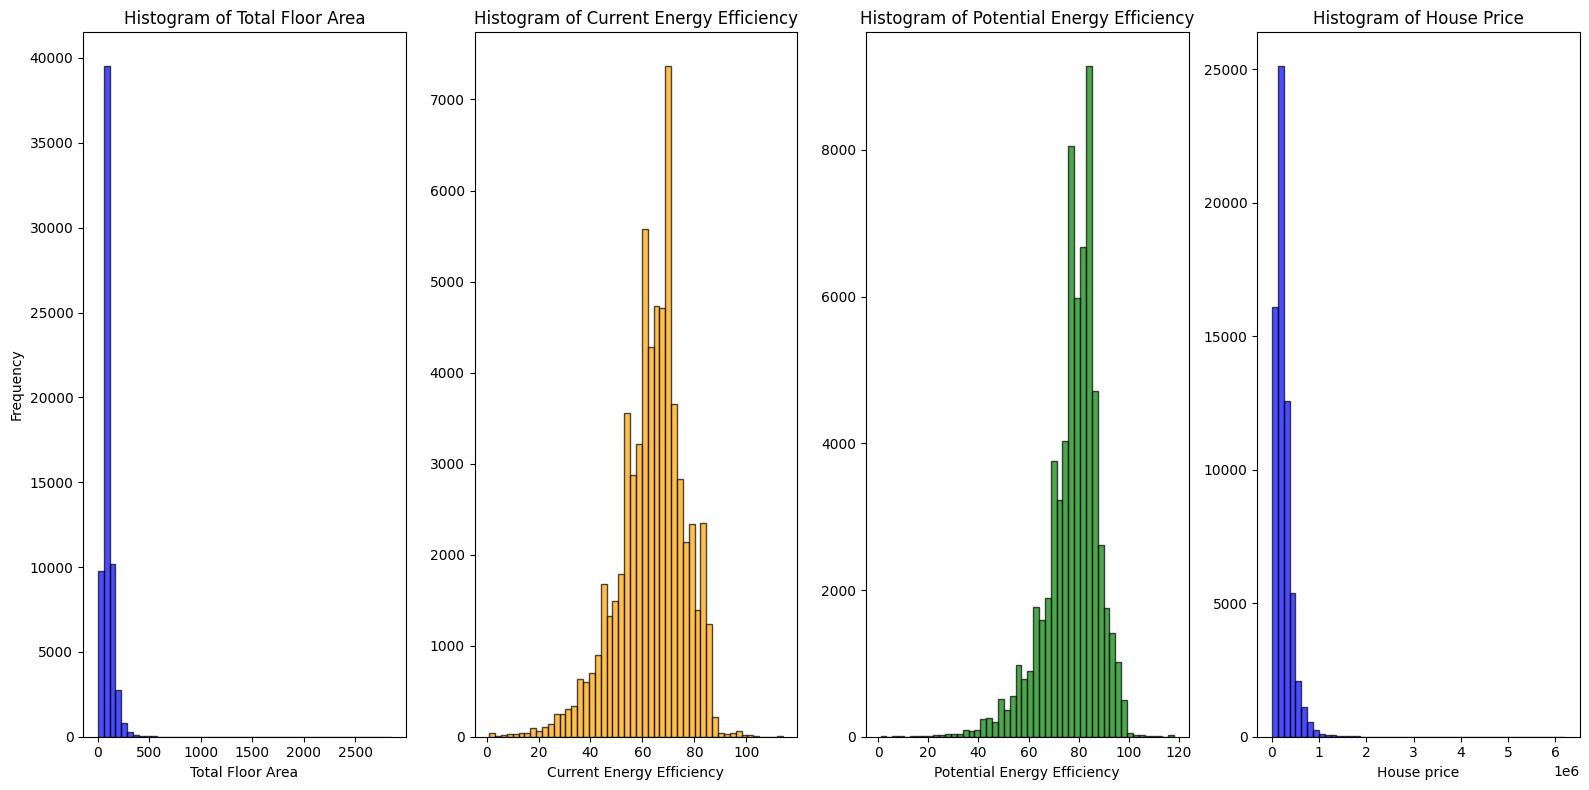

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(16, 8))

# Plot histogram for Total Floor Area
axs[0].hist(warw_data['tfarea'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axs[0].set_xlabel('Total Floor Area')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Total Floor Area')

# Plot histogram for Current Energy Efficiency
axs[1].hist(warw_data['c_energy'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axs[1].set_xlabel('Current Energy Efficiency')
axs[1].set_title('Histogram of Current Energy Efficiency')

# Plot histogram for Potential Energy Efficiency
axs[2].hist(warw_data['p_energy'], bins=50, alpha=0.7, color='green', edgecolor='black')
axs[2].set_xlabel('Potential Energy Efficiency')
axs[2].set_title('Histogram of Potential Energy Efficiency')

# Plot histogram for Potential Energy Efficiency
axs[3].hist(warw_data['price'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axs[3].set_xlabel('House price')
axs[3].set_title('Histogram of House Price')

# Avoiding overlap
plt.tight_layout()
plt.show()

The total floor area and house price plots show a distribution that is positively skewed while the current and potential energy efficiency plots show a relatively negative skewness. In order to address this, log-linear will be used.

Text(87.72222222222221, 0.5, 'House Price')

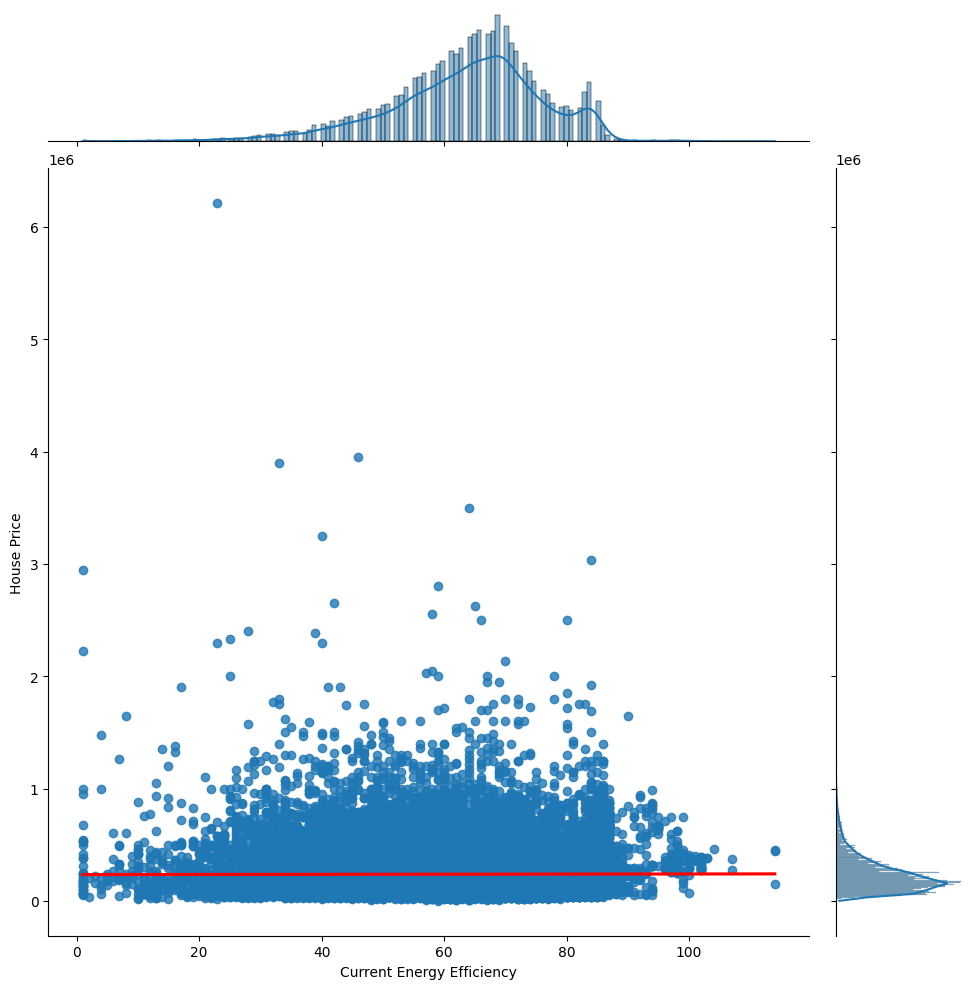

In [12]:
#scatter v hist. plots visualisation with regression line 
sns.jointplot(data=warw_data, 
                x='c_energy', 
                y='price', 
                kind="reg", 
                scatter_kws=dict(alpha=0.8), 
                line_kws=dict(color='red'), 
                height=10) 

plt.xlabel('Current Energy Efficiency') 
plt.ylabel('House Price') 

Text(87.72222222222221, 0.5, 'House Price')

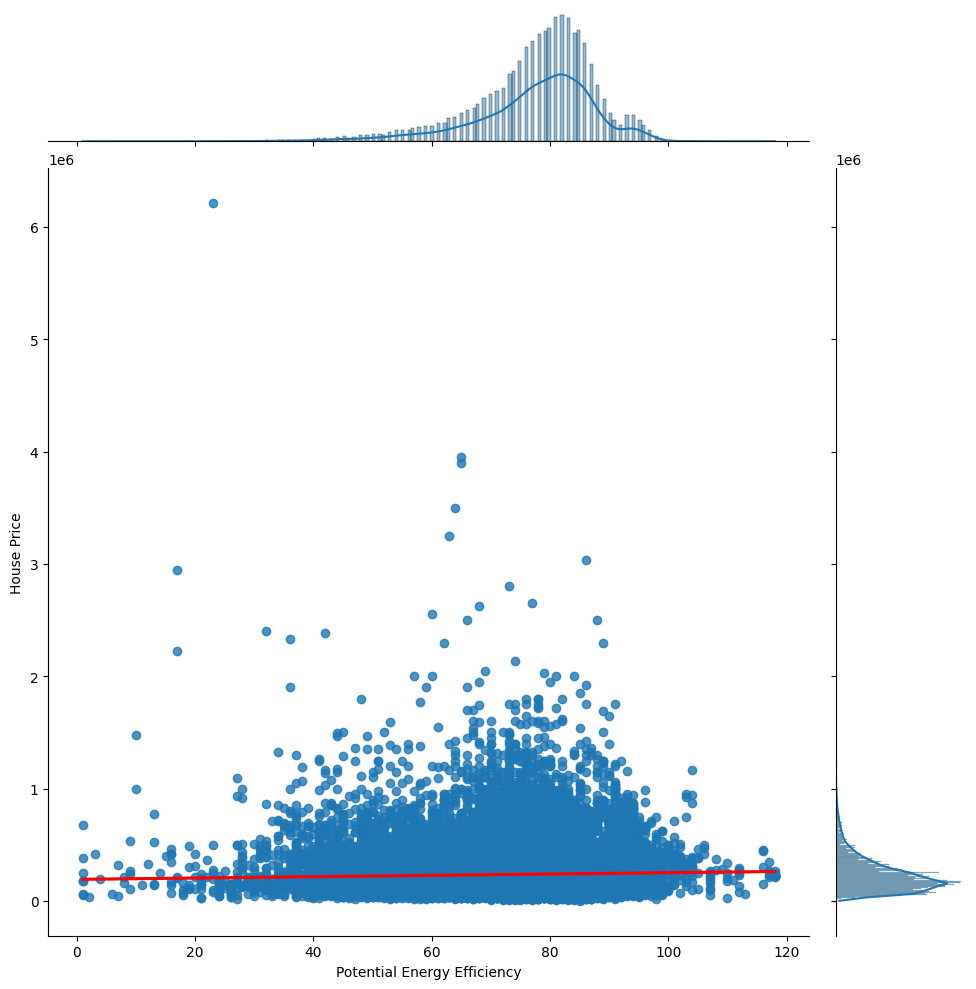

In [13]:
#scatter v hist. plots visualisation with regression line 
sns.jointplot(data=warw_data, 
                x='p_energy', 
                y='price', 
                kind="reg", 
                scatter_kws=dict(alpha=0.8), 
                line_kws=dict(color='red'), 
                height=10) 

plt.xlabel('Potential Energy Efficiency') 
plt.ylabel('House Price') 

Text(87.72222222222221, 0.5, 'House Price')

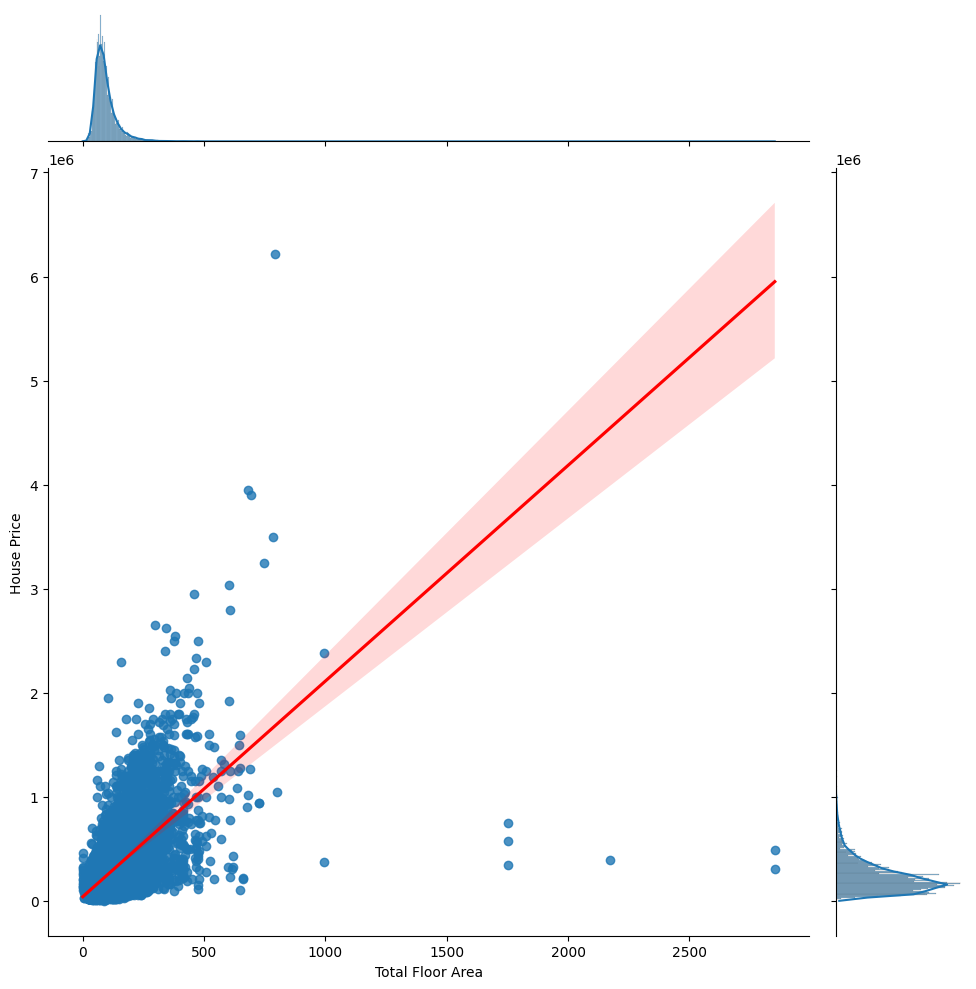

In [14]:
#scatter v hist. plots visualisation with regression line 
sns.jointplot(data=warw_data, 
                x='tfarea', 
                y='price', 
                kind="reg", 
                scatter_kws=dict(alpha=0.8), 
                line_kws=dict(color='red'), 
                height=10) 

plt.xlabel('Total Floor Area') 
plt.ylabel('House Price') 

### Preparing Data for Model Building

In [15]:
#Handling the outlier in the price column
# Get the top 20 minimum values in the price column
top_10_min_tfarea = warw_data.nsmallest(20, 'tfarea')

# Display the price and tfarea columns
print(top_10_min_tfarea['tfarea'])


22262    0.00
28484    0.00
28594    0.00
28633    0.00
28634    0.00
28652    0.00
28682    0.00
28948    0.00
28969    0.00
29343    0.00
48502    0.00
48503    0.00
49086    0.00
49087    0.00
31019    5.88
31020    5.88
31021    5.88
7872     7.10
7873     7.10
7874     7.10
Name: tfarea, dtype: float64


There are `14` transaction indexes with a total floor area equal to zero which is unrealistic hence they will be taken off before building the model 

In [16]:
#Handling the outlier in the price column
# Get the top 10 minimum values in the price column
top_10_min_prices = warw_data.nsmallest(10, 'price')

# Display only the price column
print(top_10_min_prices['price'])

41966     1500.0
11318    10000.0
22283    10500.0
36891    11400.0
49527    11500.0
18866    12000.0
42461    12000.0
54821    12160.0
37888    12240.0
804      12500.0
Name: price, dtype: float64


It is confirmed that the price column has one row with price `1,500` which is unrealistic therefore it will be taken out.

In [17]:
#Taking care of the outlier in the 'price' column
# Remove the row where the 'price' column has a value of 1500
warw_new = warw_data[warw_data['price'] != 1500]

# Reset the index to realign the rows, dropping the old index
warw_new.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(warw_new)


          priceper  year dateoftransfer propertytype duration     price  \
0      3302.752294  2013     2013-03-22            D        F  360000.0   
1      2370.129870  2010     2010-07-30            D        F  292000.0   
2      2921.710670  2004     2004-06-25            F        L  133902.0   
3      3054.767619  2005     2005-12-16            F        L  140000.0   
4      2100.394366  2013     2013-01-04            S        F  149128.0   
...            ...   ...            ...          ...      ...       ...   
63548  1821.917808  2002     2002-05-31            S        F  133000.0   
63549  1492.123967  2012     2012-12-19            S        F  180547.0   
63550  1936.842105  2000     2000-06-07            S        F   92000.0   
63551  4631.578947  2011     2011-09-28            S        F  220000.0   
63552  6631.578947  2019     2019-06-17            S        F  315000.0   

       postcode    lad21cd                           transactionid        id  \
0       CV8 2AS  E0

In [18]:
#to comfirm if the removal worked
top_10_min_prices = warw_new.nsmallest(10, 'price')

# Display only the price column
print(top_10_min_prices['price'])


11318    10000.0
22283    10500.0
36891    11400.0
49526    11500.0
18866    12000.0
42460    12000.0
54820    12160.0
37888    12240.0
804      12500.0
45318    13750.0
Name: price, dtype: float64


In [19]:
#Taking care of the outlier in the 'price' column
# Remove the row where the 'price' column has a value of 1500
warw_new = warw_data[warw_data['tfarea'] !=0]

# Reset the index to realign the rows, dropping the old index
warw_new.reset_index(drop=True, inplace=True)

# Display the updated DataFrame
print(warw_new)


          priceper  year dateoftransfer propertytype duration     price  \
0      3302.752294  2013     2013-03-22            D        F  360000.0   
1      2370.129870  2010     2010-07-30            D        F  292000.0   
2      2921.710670  2004     2004-06-25            F        L  133902.0   
3      3054.767619  2005     2005-12-16            F        L  140000.0   
4      2100.394366  2013     2013-01-04            S        F  149128.0   
...            ...   ...            ...          ...      ...       ...   
63535  1821.917808  2002     2002-05-31            S        F  133000.0   
63536  1492.123967  2012     2012-12-19            S        F  180547.0   
63537  1936.842105  2000     2000-06-07            S        F   92000.0   
63538  4631.578947  2011     2011-09-28            S        F  220000.0   
63539  6631.578947  2019     2019-06-17            S        F  315000.0   

       postcode    lad21cd                           transactionid        id  \
0       CV8 2AS  E0

In [20]:
# Get the top 10 minimum values in the price column
top_10_min_prices = warw_new.nsmallest(20, 'tfarea')

# Display the price and tfarea columns
print(top_10_min_prices['tfarea'])

31009     5.88
31010     5.88
31011     5.88
7872      7.10
7873      7.10
7874      7.10
7875      7.10
57993    10.40
61321    10.92
61322    10.92
35003    16.34
35004    16.34
21623    17.00
46109    19.04
46110    19.04
46111    19.04
5512     19.69
5513     19.69
27475    19.81
27476    19.81
Name: tfarea, dtype: float64


### Creating Dummy Variable 

**duration** column, where `F` denotes that the property is a freehold interest and `L` is leasehold interest
So, for the dummy, `1` will be for the freehold while `0` is for the leasehold  interest.

In [21]:
# Ensure the column 'duration' exists before applying the mapping
if 'duration' in warw_new.columns:
    # Create the dummy variable column 'd_dummy'
    warw_new.loc[:, 'd_dummy'] = warw_new['duration'].map({'F': 1, 'L': 0})
    #warw_new['d_dummy'] = warw_new['duration'].map({'F': 1, 'L': 0})
else:
    print("The column 'duration' does not exist in the DataFrame.")

# Display the updated DataFrame
print(warw_new)


          priceper  year dateoftransfer propertytype duration     price  \
0      3302.752294  2013     2013-03-22            D        F  360000.0   
1      2370.129870  2010     2010-07-30            D        F  292000.0   
2      2921.710670  2004     2004-06-25            F        L  133902.0   
3      3054.767619  2005     2005-12-16            F        L  140000.0   
4      2100.394366  2013     2013-01-04            S        F  149128.0   
...            ...   ...            ...          ...      ...       ...   
63535  1821.917808  2002     2002-05-31            S        F  133000.0   
63536  1492.123967  2012     2012-12-19            S        F  180547.0   
63537  1936.842105  2000     2000-06-07            S        F   92000.0   
63538  4631.578947  2011     2011-09-28            S        F  220000.0   
63539  6631.578947  2019     2019-06-17            S        F  315000.0   

       postcode    lad21cd                           transactionid        id  \
0       CV8 2AS  E0

/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_28728/767410848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  warw_new.loc[:, 'd_dummy'] = warw_new['duration'].map({'F': 1, 'L': 0})


In [22]:
#checking whether it worked perfectly
warw_new[['duration', 'd_dummy']].head

<bound method NDFrame.head of       duration  d_dummy
0            F      1.0
1            F      1.0
2            L      0.0
3            L      0.0
4            F      1.0
...        ...      ...
63535        F      1.0
63536        F      1.0
63537        F      1.0
63538        F      1.0
63539        F      1.0

[63540 rows x 2 columns]>

### Correlation Matrix (Pearson)

For better reliability of the model results the variables for the model should not be highly correlated, so Pearson correlation matrix will be used to test this condition.

In [23]:
# correlation for numerical variables only
warw_new.corr(numeric_only=True)

,priceper,year,price,id,tfarea,numberrooms,classt,c_energy,p_energy,d_dummy
priceper,1.000000,0.772785,0.620387,0.013051,-0.024696,0.017239,-0.040144,0.115619,0.160136,0.071789
year,0.772785,1.000000,0.551930,0.014370,0.055876,0.042122,-0.041587,0.143967,0.206375,0.051818
price,0.620387,0.551930,1.000000,0.036928,0.622724,0.559851,-0.084304,0.004114,0.035757,0.272768
id,0.013051,0.014370,0.036928,1.000000,0.031750,0.025392,-0.009418,0.003480,0.017260,-0.004424
tfarea,-0.024696,0.055876,0.622724,0.031750,1.000000,0.737345,-0.082916,-0.093067,-0.093105,0.325160
numberrooms,0.017239,0.042122,0.559851,0.025392,0.737345,1.000000,-0.113321,-0.139995,-0.093746,0.516302
classt,-0.040144,-0.041587,-0.084304,-0.009418,-0.082916,-0.113321,1.000000,-0.106232,-0.161935,-0.152051
c_energy,0.115619,0.143967,0.004114,0.003480,-0.093067,-0.139995,-0.106232,1.000000,0.647040,-0.118040
p_energy,0.160136,0.206375,0.035757,0.017260,-0.093105,-0.093746,-0.161935,0.647040,1.000000,0.098514
d_dummy,0.071789,0.051818,0.272768,-0.004424,0.325160,0.516302,-0.152051,-0.118040,0.098514,1.000000


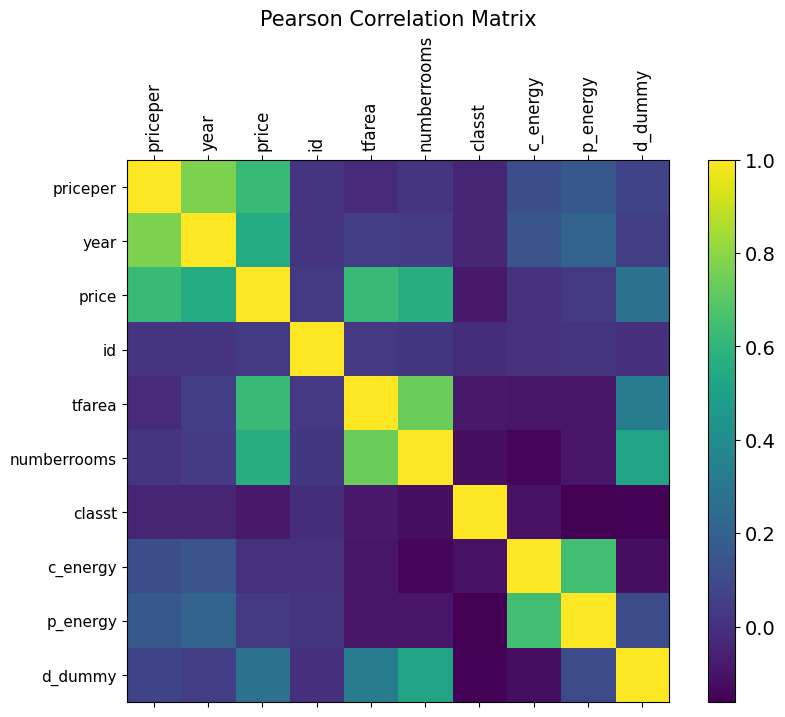

In [24]:
 # Select only numeric columns
warw_new = warw_new.select_dtypes(include=[np.number]) 

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 7))
plt.matshow(warw_new.corr(), fignum=f.number)  
plt.xticks(range(warw_new.shape[1]), warw_new.columns, fontsize=12, rotation=90)
plt.yticks(range(warw_new.shape[1]), warw_new.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson Correlation Matrix', fontsize=15)
plt.show()

### Matrix of Variables to be Used in the Model 

In [25]:
# selected columns
sel_columns = ['price', 'tfarea', 'c_energy', 'p_energy', 'd_dummy']
warw_df = warw_new[sel_columns]


In [26]:
warw_df.head()

,price,tfarea,c_energy,p_energy,d_dummy
0,360000.0,109.00,59,80,1.0
1,292000.0,123.20,39,60,1.0
2,133902.0,45.83,72,82,0.0
3,140000.0,45.83,72,82,0.0
4,149128.0,71.00,32,80,1.0


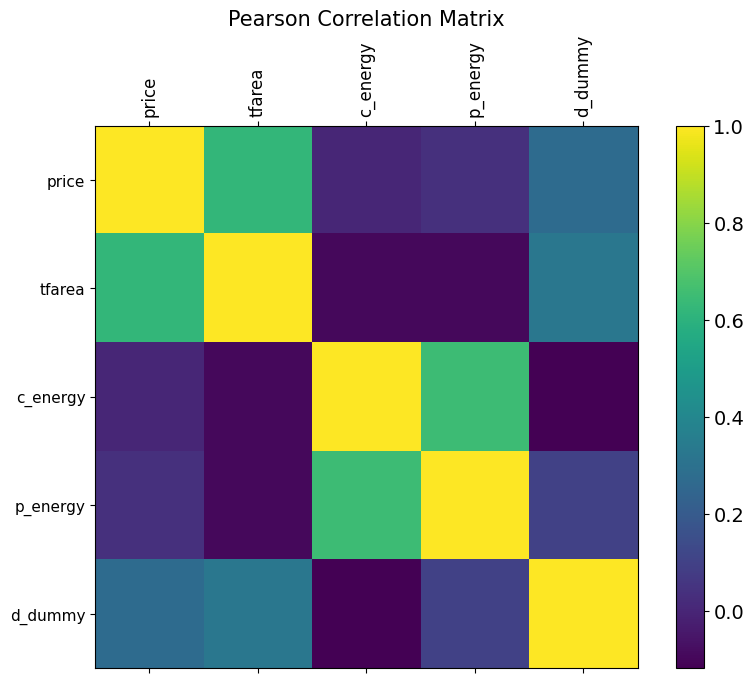

In [27]:
 # Select only numeric columns
warw_df = warw_df.select_dtypes(include=[np.number]) 

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 7))
plt.matshow(warw_df.corr(), fignum=f.number)  
plt.xticks(range(warw_df.shape[1]), warw_df.columns, fontsize=12, rotation=90)
plt.yticks(range(warw_df.shape[1]), warw_df.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Pearson Correlation Matrix', fontsize=15)
plt.show()

The matrix plots have shown no high collinearity among the variables. But for the sake of the reliability of our results, it will be further investigated using other matrices like the Variance Inflation Factor (VIF). 

## Methodology

### Linear Regression Model (LRM)

LRM is a statistical model that is employed in data analysis to establish the connection between variables (dependent and independent). The algorithm of this works on the premise that there exists a direct relationship between the variables. 

**Model:** 

\begin{equation}
y = \beta_0 + \beta_1X_1 + ...+ \beta_nX_n + \epsilon
\end{equation}

Where: dependent variable is `y`, intercept is `β₀`,  coefficients of `X` variables is `β`, `X`= independent variables, `ε` = error term. 

LRM is commonly utilized because of its straightforwardness and ease of interpretation. As per [Montgomery et al (2021)](http://sutlib2.sut.ac.th/sut_contents/H133678.pdf), the model offers a basic indication of the extent of the connection between variables during the initial analysis phase.

###  Log-Linear Regression Model
It is utilised when the dependent variable is anticipated to increase exponentially instead of linearly. This approach includes applying the natural logarithm to the outcome variable before conducting linear regression on the modified variable.

Log-linear is especially effective in handling heteroscedasticity and representing multiplicative impacts. It helps to stabilize the variability of error terms and can convert a nonlinear association into a linear one, simplifying the modeling and interpretation process ([Von Eye et al., 2012](https://wires.onlinelibrary.wiley.com/doi/pdf/10.1002/wics.203)).

###  Random Forest (RF)

RF involves combining several decision trees to produce a more precise and reliable prediction by utilizing ensemble learning. According to [Pai and Wang (2020)](https://www.mdpi.com/2076-3417/10/17/5832), RF displays a high degree of flexibility, allowing it to capture complex, non-linear connections in the data without requiring any predefined distribution assumptions





### Advanced Analysis

In [28]:
#  NaN or infinite values drop in variables
warw_df = warw_df.dropna(subset=['price', 'tfarea', 'c_energy', 'p_energy', 'd_dummy'])


#Building the LR model
X = warw_df[['tfarea', 'c_energy', 'p_energy', 'd_dummy']]
X = sm.add_constant(X)
# y variable
y = warw_df['price']
# OLS model
LR_model = sm.OLS(y, X).fit()
# summary of model
print(LR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.062e+04
Date:                Sat, 06 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:28:48   Log-Likelihood:            -8.4252e+05
No. Observations:               63535   AIC:                         1.685e+06
Df Residuals:                   63530   BIC:                         1.685e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.764e+04   4208.789    -20.823      0.0

`condition no.` of `1.1e+03` signals the existence of multicollinearity which requires further improvements.

### Correcting Multicollinearity Using VIF

In [29]:
# Variance Inflation Factor (VIF) helps in dropping correlated variables using a threshold
'''
Calculate VIF for each feature in the DataFrame. 
Set a threshold (default is 5). 
So, features with VIF greater than this threshold, it will be removed. 
Add a constant to VIF calculations to ensure correct results. 
Repeat the process until no feature has a VIF above the threshold. 
Return the cleaned DataFrame with multicollinear features removed.
'''
features = ['tfarea', 'c_energy', 'p_energy', 'd_dummy']

#  VIF constant
X = add_constant(warw_df[features])

# df and their VIFs
vif_d = pd.DataFrame()
vif_d['Feature'] = X.columns

# VIF 
vif_d['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print("Initial VIF values:")
print(vif_d)

# removing features with VIF > threshold
while vif_d[vif_d['Feature'] != 'const']['VIF'].max() > 5:
    # maximum VIF
    remove = vif_d.sort_values('VIF', ascending=False).iloc[0]
    if remove['Feature'] == 'const':
        break
    
    # Drop high VIF
    X = X.drop(columns=remove['Feature'])
    vif_d = pd.DataFrame()
    vif_d['Feature'] = X.columns
    vif_d['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

    print(f"\nDropping '{remove['Feature']}' with VIF: {remove['VIF']}")
    print(vif_d)
    
print("\nFinal set of features after VIF reduction:")
print(vif_d)


Initial VIF values:
    Feature        VIF
0     const  58.289505
1    tfarea   1.140291
2  c_energy   1.828026
3  p_energy   1.846706
4   d_dummy   1.208735

Final set of features after VIF reduction:
    Feature        VIF
0     const  58.289505
1    tfarea   1.140291
2  c_energy   1.828026
3  p_energy   1.846706
4   d_dummy   1.208735


Since all the features passed VIF test, log-linear will be adopted to improve the model.

### Model Matrice

In [30]:
# coefficients
intercept, *coefficients = LR_model.params

# p-values
p_values = LR_model.pvalues

# model equation
print(f"y = {intercept:.2f} + {coefficients[0]:.2f} * X1 + ... + {coefficients[-1]:.2f} * Xn")
print(f"R^2 = {LR_model.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.4f}")

# predictors
feature_names = ['tfarea', 'c_energy', 'p_energy', 'd_dummy']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.4f}")

y = -87641.20 + 2025.99 * X1 + ... + 29444.47 * Xn
R^2 = 0.40080
p-value of intercept = 0.0000
p-value of tfarea = 0.0000
p-value of c_energy = 0.0000
p-value of p_energy = 0.0000
p-value of d_dummy = 0.0000


/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_28728/2530118028.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.4f}")
/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_28728/2530118028.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.4f}")


### Residuals

Helps in checking the LRM assumptions

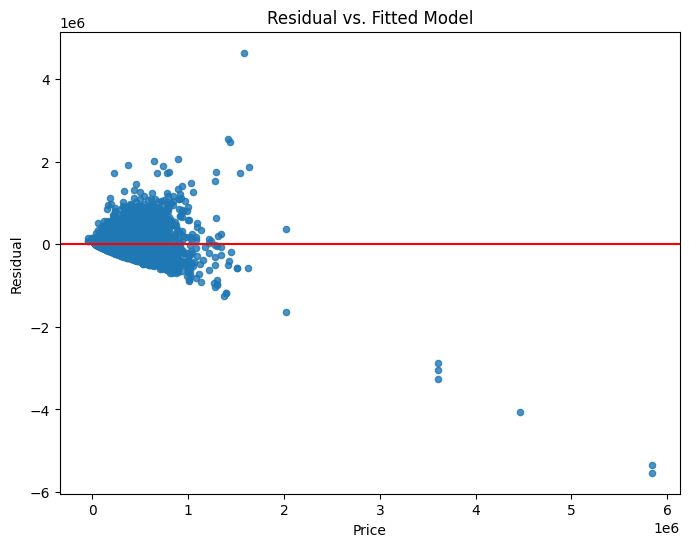

In [31]:
# Scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot 
plt.scatter(LR_model.fittedvalues, LR_model.resid, alpha=0.8, s=20)

# title
plt.xlabel('Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Model')

# include reg. line
plt.axhline(y=0, color='red', linestyle='-')

plt.show()


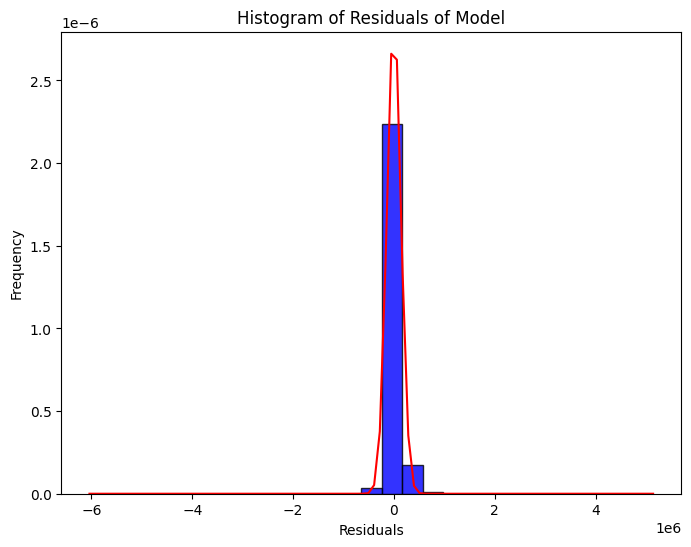

In [32]:
#Histogram of model 
residuals = LR_model.resid

# fig. size
plt.figure(figsize=(8, 6))  
plt.hist(residuals, bins=25, color='blue', edgecolor='black', alpha=0.8, density=True)

# distribution of residuals computation
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
# normal distribution curve
plt.plot(x, p, 'r', linewidth=1.5)
# title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of Model')
# show plot
plt.show()

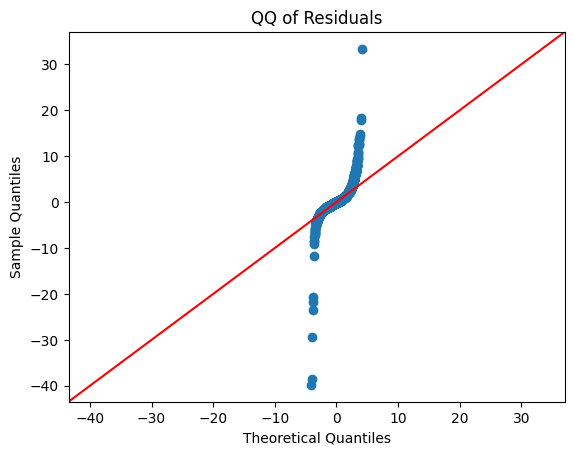

In [33]:
# QQ plot
fig = sm.qqplot(LR_model.resid, fit=True, line="45")
plt.title('QQ of Residuals')
# show plot
plt.show()

Points off the reference line at the upper and bottom section 

### Log-Linear

In [34]:
#  logarithms of variables without the dummy column
x_variables = ["price", "tfarea", "c_energy", "p_energy"]
log_x_vars = []
for x in x_variables:
    warw_df[f"log_{x}"] = np.log(warw_df[x])
    log_x_vars.append(f"log_{x}")

In [35]:
warw_df.head(10)

,price,tfarea,c_energy,p_energy,d_dummy,log_price,log_tfarea,log_c_energy,log_p_energy
0,360000.0,109.00,59,80,1.0,12.793859,4.691348,4.077537,4.382027
1,292000.0,123.20,39,60,1.0,12.584509,4.813809,3.663562,4.094345
2,133902.0,45.83,72,82,0.0,11.804863,3.824939,4.276666,4.406719
3,140000.0,45.83,72,82,0.0,11.849398,3.824939,4.276666,4.406719
4,149128.0,71.00,32,80,1.0,11.912560,4.262680,3.465736,4.382027
5,187500.0,140.00,53,76,1.0,12.141534,4.941642,3.970292,4.330733
6,475000.0,140.00,53,76,1.0,13.071070,4.941642,3.970292,4.330733
7,715000.0,140.00,53,76,1.0,13.480038,4.941642,3.970292,4.330733
8,566500.0,201.00,49,73,1.0,13.247232,5.303305,3.891820,4.290459
9,135000.0,122.00,54,79,1.0,11.813030,4.804021,3.988984,4.369448


In [36]:
#log modelling
# detailing with zeros or negative that cannot be log-transformed
warw_df['log_tfarea'] = np.log(warw_df['tfarea'].clip(lower=1))
warw_df['log_c_energy'] = np.log(warw_df['c_energy'].clip(lower=1))
warw_df['log_p_energy'] = np.log(warw_df['p_energy'].clip(lower=1))
warw_df['log_price'] = np.log(warw_df['price'].clip(lower=1))

# handling infinite or NaN values 
warw_df.replace([np.inf, -np.inf], np.nan, inplace=True)
warw_df.dropna(inplace=True)

#  explanatory variables
X = warw_df[['log_tfarea', 'log_c_energy', 'log_p_energy', 'd_dummy']]
X = sm.add_constant(X) # set constant
y = warw_df['log_price'] # explained variable

log_LR_model = sm.OLS(y, X).fit()   # fitting the log_model

# summary of model
print(log_LR_model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     9586.
Date:                Sat, 06 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:28:48   Log-Likelihood:                -50574.
No. Observations:               63535   AIC:                         1.012e+05
Df Residuals:                   63530   BIC:                         1.012e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.3704      0.061    104.044   

Multicollinearity has been mitigated as evident in the reduced  `condition number` `(223)` but the `R-squared`  reduced to `0.376` but enhanced reliability.

In [37]:
# coefficients
intercept, *coefficients = log_LR_model.params

# p-values
p_values = log_LR_model.pvalues

# model equation
print(f"y = {intercept:.2f} + {coefficients[0]:.2f} * X1 + ... + {coefficients[-1]:.2f} * Xn")
print(f"R^2 = {log_LR_model.rsquared:.5f}")
print(f"p-value of intercept = {p_values[0]:.4f}")

# predictors
feature_names = ['log_tfarea', 'log_c_energy', 'log_p_energy', 'd_dummy']
for i, name in enumerate(feature_names, 1):
    print(f"p-value of {name} = {p_values[i]:.4f}")

y = 6.37 + 0.91 * X1 + ... + 0.10 * Xn
R^2 = 0.37639
p-value of intercept = 0.0000
p-value of log_tfarea = 0.0000
p-value of log_c_energy = 0.0000
p-value of log_p_energy = 0.0000
p-value of d_dummy = 0.0000


/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_28728/3501325176.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of intercept = {p_values[0]:.4f}")
/var/folders/t6/2l4skldj33v76fg1nxfgvs7c0000gn/T/ipykernel_28728/3501325176.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"p-value of {name} = {p_values[i]:.4f}")


### Log_Residual Plots

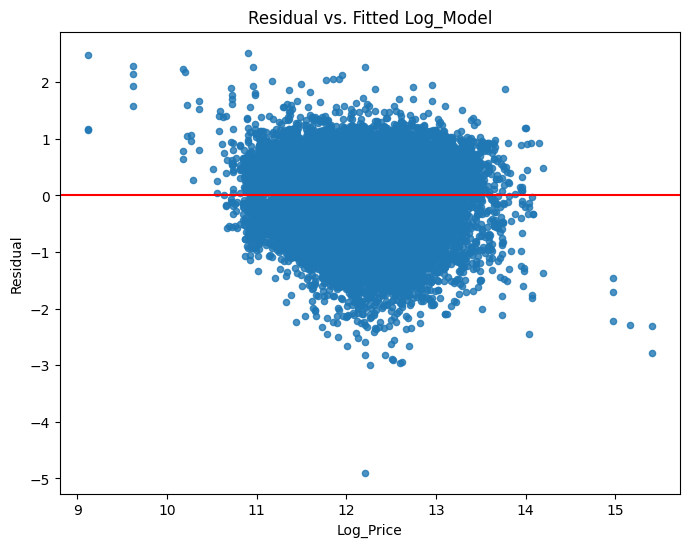

In [38]:
#scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot 
plt.scatter(log_LR_model.fittedvalues, log_LR_model.resid, alpha=0.8, s=20)
# title
plt.xlabel('Log_Price')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Log_Model')
# include reg. line
plt.axhline(y=0, color='red', linestyle='-')

plt.show()

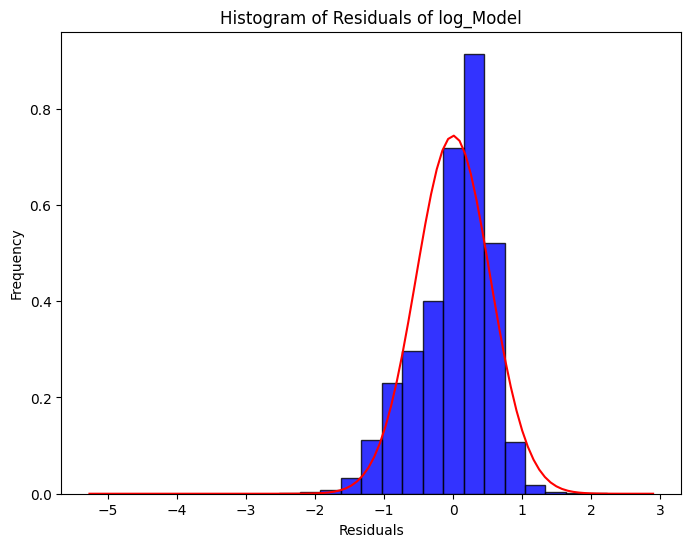

In [39]:
#Histogram of log_model 
residuals = log_LR_model.resid
# fig. size
plt.figure(figsize=(8, 6))  
plt.hist(residuals, bins=25, color='blue', edgecolor='black', alpha=0.8, density=True)

# distribution of residuals computation
mu, sigma = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
# normal distribution curve
plt.plot(x, p, 'r', linewidth=1.5)
# title
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals of log_Model')
# show plot
plt.show()

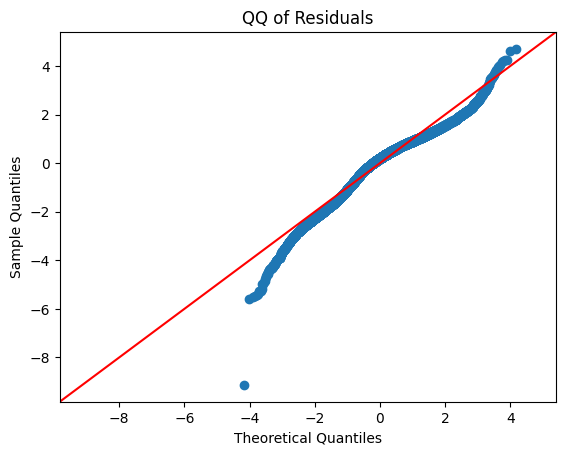

In [40]:
# QQ plot
fig = sm.qqplot(log_LR_model.resid, fit=True, line="45")
plt.title('QQ of Residuals')
# show plot
plt.show()

Plots show massive improvements 

### Random Forest


In [41]:
#Random Forest Regressor
#Variables
X = warw_df[['log_tfarea', 'log_c_energy', 'log_p_energy', 'd_dummy']] 
y = warw_df['log_price'] 

# split data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  

# RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,   
                           random_state=42, 
                           max_features='sqrt',  
                           max_depth=None, 
                           min_samples_split=2,  
                           min_samples_leaf=1)  
# training data fitting
rf.fit(X_train, y_train)

# predictions using test data
y_pred = rf.predict(X_test)

# Matrice for model evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# show metrics
print("Random Forest Regression Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.4f}")

#Importance of varibles
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))
sorted_features = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

print("Feature Importances:")
for name, importance in sorted_features:
    print(f"{name}: {importance:.4f}")


Random Forest Regression Performance:
Root Mean Squared Error (RMSE): 0.55
R^2 Score: 0.3381
Feature Importances:
log_tfarea: 0.5778
log_c_energy: 0.2089
log_p_energy: 0.1490
d_dummy: 0.0643


In [42]:
# OLS vs Random Forest models
X = warw_df[['log_tfarea', 'log_c_energy', 'log_p_energy', 'd_dummy']]  
y = warw_df['log_price']  # response variable

#split data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# RandomForestRegressor
ols_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# training data fitting
ols_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# predictions using test data
ols_predictions = ols_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

# Matrice for model evaluation
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, rmse

ols_metrics = calculate_metrics(y_test, ols_predictions)
rf_metrics = calculate_metrics(y_test, rf_predictions)

#show metrics
print("OLS Metrics:")
print(f"R2: {ols_metrics[0]:.4f}")
print(f"RMSE: {ols_metrics[1]:.4f}")

print("\nRandomForest Metrics:")
print(f"R2: {rf_metrics[0]:.4f}")
print(f"RMSE: {rf_metrics[1]:.4f}")

OLS Metrics:
R2: 0.3750
RMSE: 0.5391

RandomForest Metrics:
R2: 0.3327
RMSE: 0.5571


## Results and Discussion

Our first model achieved an $R^2$ of `0.4008`, indicating the explanatory power of the predictor variables in the model. However, it signaled multicollinearity log transformation was utilised to improve the model. The log model scored an $R^2$ of `0.3764` with no evidence of multicollinearity. This means that approximately `37.64%` of the variation in house prices at Warwick is explained by the log variables which better meet the regression assumption. The `p-values` for all the variables are `0.000`, showing that all variables are statistically significant, and `z-values` also support this. Thus, a one-unit increase in total floor area, current energy, and potential energy rating will attract a `0.9141`, `0.0711`, and `0.3107` increase in house prices respectively at Warwick. Additionally, a freehold property will attract a `0.0980` more than a leasehold.

The Random Forest model yielded a Root Mean Squared Error (RMSE) of `0.55` and an $R^2$ of `0.3381`, indicating a moderate predictive accuracy compared to the OLS. Among the features, total floor area had the highest importance at `0.5778`, followed by current energy `(0.2089)`, potential energy `(0.1490)`, and property duration `(0.0643)` aligning with the OLS results. All model results established a strong relationship between the dependent and independent variables which is the subject of this study. In comparison, the OLS model explains more variance in the data and has a lower error `(0.5391)`, making it marginally more accurate for this dataset than the RF despite its higher complexity and flexibility in modelling non-linearity in a dataset.

The residual analysis reveals that the linear relationship assumption is not satisfied in the first model but was improved by the natural log. Also, the histogram and QQ plot suggests the residuals are not normally distributed, displaying skewness and deviations from theoretical quantiles. Additionally, the residuals do not exhibit equal variance, as the range of residuals increases with the fitted values but was all standardized by the log.

### Hypothesis

In [43]:
# level of significance
alpha = 0.05

In [44]:

# numeric columns
numeric = warw_df.select_dtypes(include=['float64', 'int64']).columns

for i in range(len(numeric)):
    for j in range(i+1, len(numeric)):
        col1 = numeric[i]
        col2 = numeric[j]

        # standard deviations
        std1 = warw_df[col1].std()
        std2 = warw_df[col2].std()

        # Calculate the ratio
        std_ratio = std1 / std2
        print(f"Standard deviation ratio for {col1} and {col2} = {std_ratio}")

        # verify if sd can be assumed equal
        if 0.5 < std_ratio < 2:
            print(f"Can assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = True
        else:
            print(f"Cannot assume equal population standard deviations for {col1} and {col2}.")
            equal_stds = False


Standard deviation ratio for price and tfarea = 3329.916942002702
Cannot assume equal population standard deviations for price and tfarea.
Standard deviation ratio for price and c_energy = 13951.398953929162
Cannot assume equal population standard deviations for price and c_energy.
Standard deviation ratio for price and p_energy = 16559.101163518742
Cannot assume equal population standard deviations for price and p_energy.
Standard deviation ratio for price and d_dummy = 415633.3549518583
Cannot assume equal population standard deviations for price and d_dummy.
Standard deviation ratio for price and log_price = 264280.0232927958
Cannot assume equal population standard deviations for price and log_price.
Standard deviation ratio for price and log_tfarea = 415673.61489132134
Cannot assume equal population standard deviations for price and log_tfarea.
Standard deviation ratio for price and log_c_energy = 683446.1481210069
Cannot assume equal population standard deviations for price and lo

In [45]:
# new columns from warw_df
col1_data = warw_df[col1]
col2_data = warw_df[col2]

# t-test
test_stat, p_value = sps.ttest_ind(col1_data, col2_data, equal_var=equal_stds)
print("p-value =", p_value)

p-value = 0.0


In [46]:
# Decision on hypothesis
if p_value < alpha:
    print("p-value < significance threshold.")
    print("Reject H0. Accept H1.")
    print("Conclude that samples are drawn from populations with different means.")
elif p_value >= alpha:
    print("p-value >= significance threshold.")
    print("No significant evidence to reject H0.")
    print("Assume samples are drawn from populations with the same mean.")

p-value < significance threshold.
Reject H0. Accept H1.
Conclude that samples are drawn from populations with different means.


## Conclusion

The study examined whether the legal interest and energy efficiency of buildings influences house prices in Warwick. The OLS achieved an R² of 0.3764. This model demonstrated that total floor area, current energy rating, and potential energy rating significantly impact house prices, with a one-unit increase in these predictors leading to substantial price increases. Additionally, freehold properties were found to be more valuable than leaseholds by 0.0980 units. Residual analysis indicated that the initial linearity and homoscedasticity assumptions were not fully met in the OLS model, but these were improved with the log transformation. The significant p-values across all variables confirmed the relevance of these predictors, leading to the rejection of the null hypothesis.

The results of this research are important for policymakers and international initiatives targeting sustainable housing and energy efficiency. Therefore, the significance of advocating for energy-efficient buildings is emphasized by the substantial impact of energy ratings on property values. Policymakers and stakeholders can utilize this information to encourage energy upgrades in homes, which will help promote environmental sustainability and increase property values. Moreover, the increased value of freehold properties implies that legal changes to enhance freehold options may enhance the appeal of housing investments. Stakeholders can build a housing market that is more sustainable, valuable, and fair by emphasizing energy efficiency and legal interest. From a worldwide perspective, the results endorse Sustainable Development Goals (SDGs) 7 and 11 that strive for "Affordable and Clean Energy" and "Sustainable Cities and Communities" in order to build resilient and sustainable urban areas.

Word count: 1982

## References

- [Adan, H. and Fuerst, F., (2015). Modelling energy retrofit investments in the UK housing market: A microeconomic approach. Smart and Sustainable Built Environment, 4(3), pp.251-267.](https://www.emerald.com/insight/content/doi/10.1108/SASBE-03-2013-0016/full/html)

- [Boberg, A. and Metsalo, J., (2023). Leasehold Status and Freehold Transactions Effect on Apartment Prices: A Quantitative Study on Cooperative Apartments in Stockholm Municipality.](https://www.diva-portal.org/smash/get/diva2:1772228/FULLTEXT01.pdf)

- [Brounen, D. and Kok, N., (2011). On the economics of energy labels in the housing market. Journal of environmental economics and management, 62(2), pp.166-179.](https://www.sciencedirect.com/science/article/pii/S0095069611000337)
  
- [Fuerst, F., McAllister, P., Nanda, A. and Wyatt, P., (2015). Does energy efficiency matter to home-buyers? An investigation of EPC ratings and transaction prices in England. Energy Economics, 48, pp.145-156.](https://www.sciencedirect.com/science/article/pii/S0140988314003296)

- [Montgomery, D.C., Peck, E.A. and Vining, G.G., (2021). Introduction to linear regression analysis. John Wiley & Sons.](http://sutlib2.sut.ac.th/sut_contents/H133678.pdf)
  
- [Morrissey, J., Dunphy, N. and MacSweeney, R., (2014). Energy efficiency in commercial buildings: capturing added-value of retrofit. Journal of Property Investment & Finance, 32(4), pp.396-414.](https://www.emerald.com/insight/content/doi/10.1108/JPIF-01-2014-0008/full/pdf)

- [Pai, P.F. and Wang, W.C., (2020). Using machine learning models and actual transaction data for predicting real estate prices. Applied Sciences, 10(17), p.5832.](https://www.mdpi.com/2076-3417/10/17/5832)
  
- [Sayce, S., Sundberg, A. and Clements, B., (2010). Is sustainability reflected in commercial property prices: an analysis of the evidence base.](https://eprints.kingston.ac.uk/id/eprint/15747/1/Sayce-S-15747.pdf)
  
- [Von Eye, A., Mun, E.Y. and Mair, P., (2012). Log‐linear modeling. Wiley Interdisciplinary Reviews: Computational Statistics, 4(2), pp.218-223.](https://wires.onlinelibrary.wiley.com/doi/pdf/10.1002/wics.203)
